# Jupyter Notebook 的使用


## 简介

::: {.callout-important}
### 说明

1. 这里介绍的 Jupyter Notebook 是指在 VScode 中使用的 Jupyter Notebook，而不是 Anaconda 自带的 Jupyter Notebook。VScode 中的 Jupyter Notebook 更加灵活和强大，支持多种编程语言和插件。
2. 参照 [Python：安装和环境配置](01_install_Python_Anaconda.ipynb)，在 VScode 中安装了 `Jupyter` 插件后，就已经完成了 Jupyter Notebook 的安装和配置。简言之：你需要安装 Anaconda 套装，并在 VScode 中安装插件：`python` 和 `Jupyter` 插件。

:::

顾名思义，Jupyter Notebook 是一个文本编辑器。它类似于 Stata 的 Do 文件 (`.do`)；或 R 语言中 RStudio 的 RMarkdown 文件 (`.rmd`)。Jupyter Notebook 的特征更接近于 RMardown，它提供了一个交互式的计算环境，允许你在一个文档中编写和运行代码、可视化数据、撰写文本和公式等。

简言之，你可以把你的分析目的 (**文本块**)，分析过程 (**代码块**)，分析结果 (**表格或图形**) 都整合到一个文档中，形成一个完整的分析报告。如果安装了编程助手 (如 Copilot)，还可以在编写代码时获得智能提示、自动补全和根据提示词自动编写代码和修改文字的功能。

![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20250516180903.png){width="900px"}


## 运行 Python 代码

我们先演示一下如何在 VScode 中编写 Python 代码：

- 点击 **File** &rarr; **New File ...**，选择 `Jupyter Notebook .ipynb`，填入文件名，即可新建一个 Jupyter Notebook。
- 点击 `+ Code` 按钮，添加一个代码单元格，输入 Python 代码，然后点击运行按钮 (或按 `Shift + Enter`) 执行代码。

![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20250730001935.png){width="700px"}

> [点击查看原始 .ipynb 文件](../examples/sample_notebook_python.ipynb)

由于 Jupyter Notebook 对 Python 的支持一直非常好，因此在 Jupyter Notebook 中编写和运行 Python 代码非常顺畅。比如，你可以运行或修改上图中的代码：


In [ ]:
# 绘制一幅简单的函数图

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 200)
y = x ** 2

plt.figure(figsize=(3, 2.5))
plt.plot(x, y)
plt.title("y = x^2")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

下面，我会从项目的角度，介绍如何使用 Jupyter Notebook。首先，我们会新建一个文件夹，然后在该文件夹下按需创建几个子文件夹，用于分类存储 Data, Codes 和输出结果。最后，我们会在根目录下或 Codes 文件夹下创建 Jupyter Notebook 文件，编写代码并运行。

## 运行 Stata 代码

多数情况下，你能在 dofile 或 Stata 命令窗口中运行的代码，都可以在 Jupyter Notebook 中运行。以下是一个简单的 Stata 代码示例，比如：

In [ ]:
dis "nbstata is so NB"

nbstata is so NB


再看一个更完整的例子：使用 Stata 自带的 `sysuse auto` 数据集，绘制汽车价格与重量的散点图，并把图形保存到当前工作路径下。


D:\temp
checking scheme_scientific consistency and verifying not already installed...
all files already exist and are up to date.
(1978 automobile data)

       price   weight   mpg  
  1.   4,099    2,930    22  
  2.   4,749    3,350    17  
  3.   3,799    2,640    22  
file scatter_price_weight.png written in PNG format


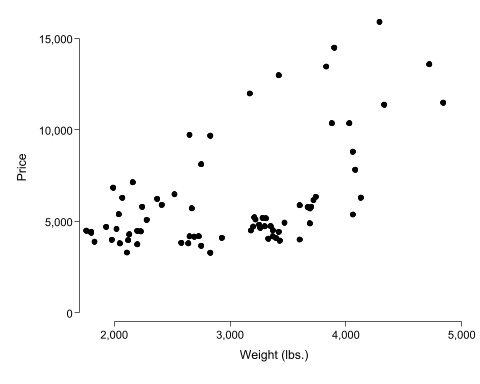

In [ ]:
cd "D:/temp"  // 设置工作目录，酌情修改或忽略此行

// 安装绘图模板
net install scheme_scientific.pkg, replace
set scheme scientific

sysuse "auto.dta", clear

list price weight mpg in 1/3, clean 

scatter price weight
graph export "scatter_price_weight.png", replace width(700)

### 魔法命令

有少数 Stata 命令是无法在 Jupyter Notebook 中直接使用的，比如 `browse`, `doedit`, `set graph_width` 等。这些命令通常都涉及到文件的读写和图形的显示，而不是简单地在结果窗中打印文字和数字结果。

不过，我们可以借助 `nbstata` 的魔法命令来实现多数功能。

`nbstata` 目前支持以下魔法指令，详情参见 [nbstata 文档](https://hugetim.github.io/nbstata/)，以及 [nbstata User Guide](https://hugetim.github.io/nbstata/user_guide.html)。

| 命令      | 描述                            |
| :-------- | :----------------------------- |
| %browse   | 查看数据集                      |
| %head     | 查看前 5 (或 N) 行            |
| %tail     | 查看最后 5 (或 N) 行          |
| %frbrowse | 查看数据框                      |
| %frhead   | 查看前 5 (或 N) 个数据框       |
| %frtail   | 查看最后 5 (或 N) 个数据框     |
| %locals   | 列出暂元和它们的值              |
| %delimit  | 打印当前分隔符                  |
| %help     | 显示 Stata 帮助                |
| %set      | 设置单个配置选项                |
| %%set     | 设置多个配置选项                |
| %status   | 显示 Stata 或配置状态           |
| %%echo    | 显示命令回显                    |
| %%noecho  | 不显示命令回显                  |
| %%quietly | 静默所有单元输出，包括图表       |

我设置的图片默认尺寸比较大，如需调整，可以使用 `nbstata` 的 [魔法命令](https://hugetim.github.io/nbstata/user_guide.html) 设置图片尺寸。

需要注意的是，魔法命令需要以 `%` 或 `%%` 开够，且只有放在代码块的第一行才会被识别为魔法命令。因此，我通常会让魔法命令独占一行：

In [ ]:
%set graph_width = 5.0in   // 将图形宽度设置为 5.0 英寸

In [ ]:
%set graph_height = 4.0in  // 将图形高度设置为 4.0 英寸

再看几个有趣的例子：

- `%status` 可以显示当前 Stata 的版本和配置状态。
- `%head` 可以查看数据集的前 5 行，或者指定行数。我猜是借用了 Python 中的 `head()` 函数。

In [ ]:
%status

    System information
      Python version         3.12.7
      Stata version          Stata 17.0 (MP)
      Stata library path     D:\stata17\mp-64.dll
      Stata initialized      True
      sfi initialized        True

    Settings
      graphic display        True
      graphic size           width = 5.0in, height = 4.0in
      graphic format         png

      echo                   None
      missing                .
      browse_auto_height     True
      config file path       C:\Users\Administrator\.config\nbstata\nbstata.conf


In [ ]:
%head price weight mpg make foreign

,price,weight,mpg,make,foreign
1,"4,099","2,930",22,AMC Concord,Domestic
2,"4,749","3,350",17,AMC Pacer,Domestic
3,"3,799","2,640",22,AMC Spirit,Domestic
4,"4,816","3,250",20,Buick Century,Domestic
5,"7,827","4,080",15,Buick Electra,Domestic



## 项目结构文档 

本节的目的是帮助你建立一个规范的项目文件结构，以便于管理和组织你的代码、数据和文档。养成良好的项目管理习惯对于后续处理大型项目很有帮助。

- 本地新建一个文件夹，如 **D:/FinData/Proj_Maotai**
- (推荐) 在该文件夹下新建如下几个子文件夹，用于分类存放文件
    - [`./data`]：存放 .csv、.xlsx 等数据文件
    - [`./doc`]：存放说明文档、报告等文件
    - [`./codes`]：存放代码文件，包括自编函数、模块等
    - [`./output`]：存放输出文件，包括图表、结果等
    - 此外，建议在该文件夹下新建一个 `README.md` 文件，对项目进行说明 (如项目背景、目标、数据来源、程序的执行顺序和方法等)。

  ![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20250516012952.png)


## 新建 Jupyter Notebook 文件 (.ipynb)
 
- 打开 VScode，依次点击 **文件** -> **打开文件夹**，选择 **D:/FinData/Proj_Maotai** 文件夹。
- 右击该文件夹，选择 **New File** (亦可直接点击下图中的 `New File` 图标)，新建一个文件，名称为 `data_clean.ipynb`。注意：一定要以 `.ipynb` 结尾，否则无法用 Jupyter Notebook 打开，也无法添加 Python 代码块。
  - 你也可以使用**命令行方式**新建一个 `.ipynb` 文件：按快捷键 `Ctrl+Shift+P` >> 输入或选择 `Create: New Jupyter Notebook` 会打开一个名为 **Untitled-1.ipynb** 的文件，输入内容后另存到目标文件夹即可 (可以重命名，如 `data_clean.ipynb`)。

完成上述设定后，VScode 的文件目录结构如下：

```bash
# 目录结构
D:/FinData/Proj_Maotai
├── codes
├── data
├── doc
├── output
├── README.md
└── data_clean.ipynb
```

::: {.callout-note}
### 自动创建项目文档结构

如果你有多个项目需要建立，或者需要在多个项目中使用相同的文件结构，可以借助 AI 工具自动创建项目文档。本章附录中提供了一个示例提示词，供你参考。

:::

## 使用 Jupyter Notebook

**Step 1**：**选择解释器**。初次打开 `data_clean.ipynb` 文件时，可能需要按下图方式设定 Python 解释器，以便随后用 **python.exe** 来运行新增的代码块。

- 如果你没有看到该按钮，可以按快捷键 `Ctrl + Shift + P`，输入或选择 `Python: Select Interpreter`，然后选择你安装的 Python 解释器。
- 若要运行 Stata 代码，可以选择 `Stata (nbstata)` 解释器。

   ![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20250516015325.png){width="560px"}

**Step 2**：**添加 Markdown 文本块**。点击上图中的 `+ Markdown` 按钮，添加一个 Markdown 文本块。可以用 Markdown 语法撰写文档说明。

- **预览**：点击图中的 `√` 或按快捷键 `Esc`；
- **编辑**：在预览 `双击鼠标` 区可重新计入编辑模式。

   ![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20250516020205.png){width="560px"}

**Step 3a：** **让 AI 自动生成代码** (可选)：如果你已经在 VScode 中安装了插件 `Github Copilot`，可以点击图中的 `Generate` 按钮，输入提示词 (比如，`生成随机数 x~N(0,1)，N=100，绘制直方图+密度函数图, 英文标题`)，敲回车，或点击下图中的右箭头，Copilot 会自动生成代码。注意：代码块右下角有时会显示为 `Ini`，表示没有指定该代码快的类型，可以点击选择合适的类型或解释器。

   ![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20250516013612.png){width="860px"}

   ![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20250516014122.png){width="600px"}

**Step 3b：** 自行添加代码块。点击上图中的 `+ Code` 按钮，添加一个代码块。可以在代码块中输入 Python 代码。

- **运行代码块**：点击上图中的 `▶` 按钮，或按快捷键 `Ctrl + Enter`；
  
   ![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20250516021019.png){width="560px"}
   
**Step 4：** 修改和调试代码。你可以酌情修改代码。

- 若出现大量警告信息或程序无法运行，可以选中全部代码或被标注了红色波浪线代码，点击下图中的黄色星星按钮，选择 `Fix using copilot`，多数情况下都能自动修复。
- 若需现有代码进行优化，可以选中代码后，点击黄色星星，选择 `Modify using copilot`，然后输入提示词。

   ![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20250516021357.png){width="560px"}



### 界面和主要功能

在上文中，为了突出重点，我没有让 VScode 编辑器全屏。事实上，全屏后，你会发现 Jupyter Notebook 提供了一组功能强大的工具栏和菜单栏，帮助你更好地编写和运行代码。下面是 Jupyter Notebook 的主要界面元素：

![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20250516204916.png){width="860px"}

多数菜单的功能都是比较直观的，下面我简单介绍几个常用的功能：

- `View data`：查看数据和概要信息。注意：需要安装 `Data Wrangler` 插件才具有此功能。
- `...`：最右侧的三个点，点击后可以选择 `Export`，将当前 Notebook 导出为 PDF、HTML、Markdown 等格式；还有预览 (Preview) 等功能 (快捷键 `Esc`)。



## 在文档间复制 cell

### 单个 cell 的复制和粘贴

在 Jupyter Notebook 中，你可以通过以下方式在不同的 Notebook 文档之间复制 cell：

1. 打开源 Notebook 文档，选中要复制的 cell。
2. 使用快捷键 `Ctrl+C` 复制选中的 cell；亦可单击三个点图标，选择 `Copy Cell`。
3. 打开目标 Notebook 文档，将光标定位到要粘贴的位置。
4. 使用快捷键 `Ctrl+V` 粘贴 cell；亦可单击三个点图标，选择 `Paste Cell`。

### 多个 cell 的复制和粘贴

* 在 VS Code 的资源管理器（Explorer）中，分别打开需要操作的两个 Notebook 文件（如 **A.ipynb** 和 **B.ipynb**）。
  * 如需分屏显示，可拖动标签，将两个文档左右排列，方便拖拽和对比操作。
* 在源 Notebook（如 **A.ipynb**）中，按住 `Ctrl`（Mac 下为 `Command`）逐个点击左侧 cell 区域，可多选不连续的 cell；或先点击一个 cell，再按住 Shift 点击另一个 cell，选择一段连续的 cell。
  * 多选后，cell 区域会高亮显示，表示已被选中。
* 按 `Ctrl+C`（Command+C）或右键点击选中区域，选择“Copy Cell”。
* 切换到目标 Notebook（如 **B.ipynb**），点击你希望插入的位置。
* 按 `Ctrl+V`（Command+V）或右键选择 “Paste Cell”，即可将所有选中 cell 批量粘贴到目标位置。


## 导出和文档转换

在 VScode 中，你可以将 Jupyter Notebook 导出为多种格式，包括 HTML、PDF 和 Markdown。你可以在菜单栏中选择 **文件** -> **导出为**，然后选择你想要的格式。当然，还需要安装一些额外的工具来支持这些导出功能，主要包括 Pandoc 和 TeX Live。


### 安装 Pandoc（用于文档格式转换）

Jupyter 和 Quarto 在导出 Markdown、Word、PDF 时都会调用 Pandoc。

* **推荐安装方式（适用于 Anaconda 用户）**：

  ```bash
  conda install -c conda-forge pandoc
  ```

* 或者前往官网下载安装包（Windows/macOS/Linux 均支持）：
  [https://pandoc.org/install](https://pandoc.org/install)

* 安装完成后，**你可以在终端中输入以下命令测试是否成功**：

  ```bash
  pandoc --version
  ```

### 安装 TeX Live（用于导出 PDF）

Jupyter 和 Quarto 的 PDF 导出依赖 LaTeX 引擎，如 `pdflatex` 或 `xelatex`。推荐安装完整版本的 TeX Live。

* **Windows 用户**请访问官网下载器：
  [https://tug.org/texlive/windows.html](https://tug.org/texlive/windows.html)

* 安装过程中可选择 “完整版” 或 “Typical full installation”；

* 安装完成后，**务必重启 VS Code 和终端**；

* 然后在终端中测试：

  ```bash
  pdflatex --version
  ```

### 如何打开终端？

很多初学者不清楚“在终端中输入命令”具体指什么。你可以按以下方式打开终端：

* **方式一（推荐）**：
  在 VS Code 中按下快捷键 `Ctrl + ~`（就是数字 1 左侧的波浪线），即可打开内置终端。

* **方式二**：
  从系统菜单中打开：

  * Windows：点击开始 → 输入 `cmd` 或 `Anaconda Prompt` 或 `PowerShell`；
  * macOS：打开 Launchpad → 搜索「终端（Terminal）」；
  * Linux：按下 `Ctrl + Alt + T` 打开终端窗口。

终端窗口中，你可以输入如 `conda install`、`pandoc --version` 等命令，按下回车运行。

### 安装完成后即可使用以下方式导出 PDF

* 在 VS Code 中点击右上角「导出（Export）」按钮；
* 或在终端中运行：

  ```bash
  jupyter nbconvert your_notebook.ipynb --to pdf
  ```
* 或使用 Quarto（如果你已安装）：

  ```bash
  quarto render your_notebook.ipynb --to pdf
  ```

完成上述安装和设定后，即可顺利将 Notebook 文档导出为 PDF、HTML、Word 等多种格式，满足教学、写作和发布的常见需求。

### 高阶用法：使用 Quarto 导出漂亮 PDF 或制作电子书网站

如果你希望导出的文档更美观、格式更统一，或者希望将多个 Jupyter Notebook 或 Markdown 文档整合成一个电子书（book）或教学网站（website），可以考虑使用 [**Quarto**](https://quarto.org)。详情参见 [连玉君：Quarto Book](https://lianxhcn.github.io/quarto_book/)，以及采用该教程编写的 [讲义](https://www.lianxh.cn/Books.html)。

Quarto 是 RStudio 团队开发的下一代科学与技术出版平台，**同时支持 `.ipynb`、`.qmd`、`.md` 文件的混合编写和发布**。常见功能包括：

* 一键导出 **排版美观的 PDF 文档**（支持标题、目录、脚注、交叉引用、引用文献等）；
* 创建结构化的电子书（**Quarto Book**），适合撰写讲义、教程和学术教材；
* 部署交互式教学网站（**Quarto Website**），可发布为静态网页托管在 GitHub Pages 上。

#### 示例命令：

将 `.ipynb` 或 `.qmd` 导出为 PDF：

```bash
quarto render your_notebook.ipynb --to pdf
```

将多个文档组织为电子书结构（在 `_quarto.yml` 中设置章节）：

```bash
quarto render
```

#### 安装方式：

* 可从官网下载安装：[https://quarto.org/download](https://quarto.org/download)
* 安装完成后，在终端中测试：

  ```bash
  quarto --version
  ```

Quarto 完全兼容你现有的 VS Code 工作流，安装 Quarto 插件后即可直接在 VS Code 中预览、渲染和发布。对于希望构建专业文档的用户，Quarto 是目前最值得推荐的方案。


## 附录

### 借助 AI 工具自动创建项目文档 (备选)

> [ChatGPT 对话过程](https://chatgpt.com/share/6826f637-33e4-8005-b032-c8d1c93f4d7f)

如果觉得手动创建文件夹麻烦，可以借助 ChatGPT 等 AI 工具，自动创建项目文档。下面是我编写的一个示例提示词 (你只需要指定目标文件夹路径即可，即使这个文件夹不存在也没有关系)：

::: {.callout-tip}
### 提示词：自动项目文档目录

请帮我在 Windows 系统上为一个数据分析项目生成标准的项目结构。
项目的根目录是 D:/FinData/Proj_Maotai，请在该路径下创建以下结构：

```bash
D:/FinData/Proj_Maotai
├── codes             # 用于存放脚本代码
├── data              # 原始数据或处理后的数据
├── doc               # 项目文档与说明资料
├── output            # 图表、模型结果、分析报告等输出文件
├── README.md         # 项目说明文件，简要介绍项目目的与结构
├── 01_data_clean.ipynb       # 数据清洗与预处理
├── 02_EDA.ipynb              # 探索性数据分析
└── 03_regression.ipynb       # 回归分析与建模
```

请提供 Python 代码，以便我在写 Jupyter Notebook 中运行。
请确保必要的 `.ipynb` 文件和 `README.md` 都被自动生成。如果文件已存在，请保留原文件不覆盖。
你可以默认这些 `.ipynb` 文件为空白，也可以加一两行注释。

:::

经过测试，ChatGPT 和 豆包生成的代码都可以一次性顺利执行：

- [ChatGPT 对话过程](https://chatgpt.com/share/6826f637-33e4-8005-b032-c8d1c93f4d7f)
- [豆包对话过程](https://www.doubao.com/thread/wafbddcefe1636e59)


### 采用插件创建项目模板

除了上述方法，你也可以在 VScode 中搜索 `Project Templates`，安装对应的插件来创建项目模板。安装完成后，点击左侧的 `Project Templates` 图标，选择 `Create New Project`，然后选择你需要的模板即可。

- 该插件提供了多种项目模板，包括数据分析、机器学习、Web 开发等，可以酌情选择。
- 该插件也支持自定义模板，具体操作请参考插件的说明文档。

不过，如果项目不是很复杂，建议还是手动创建项目文件夹，这样更灵活，也更容易管理。